<a href="https://colab.research.google.com/github/hainmit09/DataAnalysis/blob/main/B%C3%A0i_6_B%C3%A0i_t%E1%BA%ADp_2_Ki%E1%BB%83m_%C4%91%E1%BB%8Bnh_gi%E1%BA%A3_thi%E1%BA%BFt_t%E1%BA%ADp_house_%C4%91%E1%BB%91ng_%C4%91a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Import các thư viện cần thiết

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

#1. Đọc dữ liệu

In [ ]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185827/house_price_Do%CC%82%CC%81ng-Da_Ha%CC%80-No%CC%A3%CC%82i_subdata.csv")

In [ ]:
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


# Lấy các trường cần thiết để xử lý

In [ ]:
df_p = df[['price', 'property_type']]

In [ ]:
df_p.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# 3. Tiền xử lý dữ liệu

Vẽ Box Plot để xem có cần loại bỏ dữ liệu ngoại lai không

In [ ]:
df_p.property_type.unique()

array(['trong ngo', 'mat pho'], dtype=object)

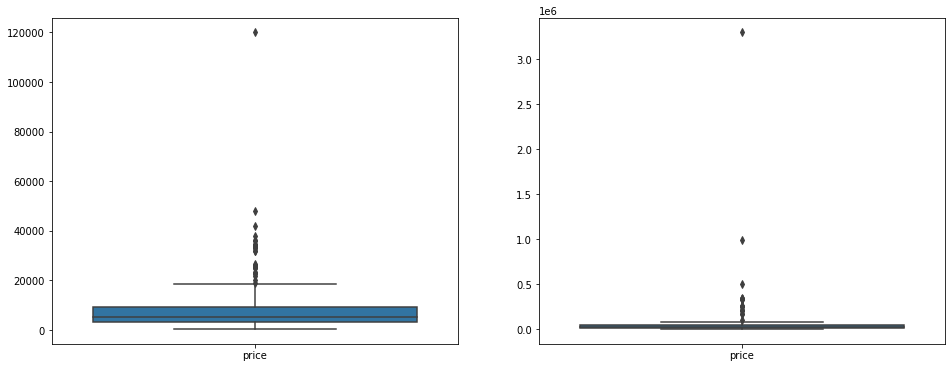

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data = df_p[df_p.property_type=='trong ngo'], ax=axis[0])
sns.boxplot(data = df_p[df_p.property_type=='mat pho'], ax=axis[1])

Xem số bản ghi mỗi loại

In [ ]:
df_p.groupby(by=['property_type']).count()

,price
property_type,
mat pho,210
trong ngo,407


Qua phân tích Boxplot, lọc bớt dữ liệu ngoại lai

In [ ]:
condition = ((df_p.property_type=='trong ngo') & (df_p.price<45000)) | ((df_p.property_type=='mat pho') & (df_p.price<90000))

In [ ]:
df_p = df_p[condition]

In [ ]:
df_p.groupby(by=['property_type']).count()

,price
property_type,
mat pho,189
trong ngo,405


#Vẽ lại đồ thị boxplot

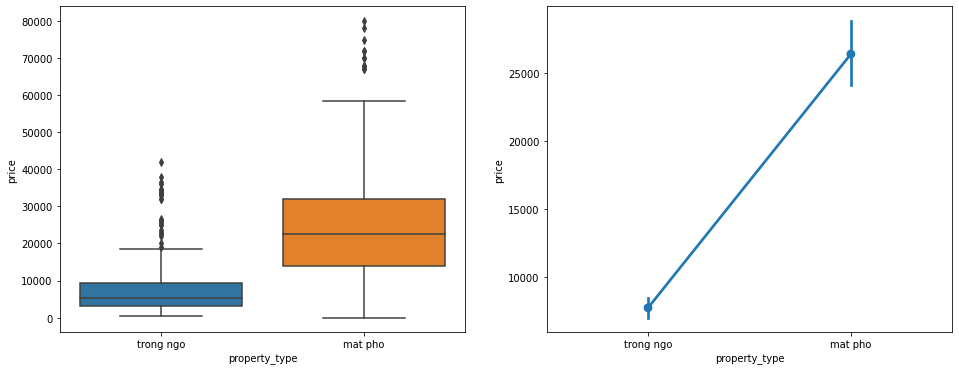

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=df_p, y='price', x='property_type', ax=axis[0])
sns.pointplot(data=df_p, y='price', x='property_type', ax=axis[1])

# 4. Vẽ phần phối giá

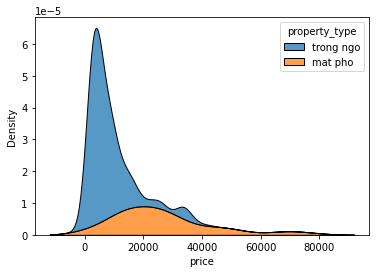

In [ ]:
sns.kdeplot(data=df_p, x="price", hue="property_type", multiple="stack")

#5. Kiểm định giả thiết giá nhà mặt phố có cao hơn nhà trong ngõ không, với mức ý nghĩa 5%
- **1. Viết giả thiết**
- Giả thiết Ho: nhà mặt phố có giá thấp hơn hoặc bằng nhà trong ngõ.
- Giả thiết H1: Nhà mặt phố có giá cao hơn nhà trong ngõ
- Mức ý nghĩa alpha = 0.05

In [ ]:
df_p.property_type.unique()

array(['trong ngo', 'mat pho'], dtype=object)

In [ ]:
statistics, p_value = scipy.stats.ttest_ind(df_p[df_p['property_type']=='mat pho']['price'], df_p[df_p['property_type']=='trong ngo']['price'])

In [ ]:
print("statistics, p_value", statistics, p_value)

statistics, p_value 18.547658503530638 6.904393958574545e-61


Kết luận: Do p_value << 2* alpha và statistic>0, nên Bác bỏ Ho, chấp nhận H1 là nhà mặt phố có giá trung bình cao hơn nhà trong ngõ

**Thử hàm** ttest_ind với tham số alternative

In [ ]:
scipy.__version__

'1.7.3'

Version 1.4.1 không hỗ trợ tham số alternative, nên cần upgrade scipy

In [ ]:
!pip install scipy --upgrade --force

  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
scipy.__version__

'1.7.3'

In [ ]:
statistics_2, p_value_2 = scipy.stats.ttest_ind(df_p[df_p['property_type']=='mat pho']['price'], df_p[df_p['property_type']=='trong ngo']['price'])

In [ ]:
statistics_1, p_value_1 = scipy.stats.ttest_ind(df_p[df_p['property_type']=='mat pho']['price'], df_p[df_p['property_type']=='trong ngo']['price'], alternative="greater")

In [ ]:
print("two side statistics_2, p_value_2", statistics_2, p_value_2)
print("one side statistics_1, p_value_1", statistics_1, p_value_1)

two side statistics_2, p_value_2 18.547658503530638 6.904393958574545e-61
one side statistics_1, p_value_1 18.547658503530638 3.4521969792872726e-61


Kết luận: Do p_value << alpha và statistic>0, nên Bác bỏ Ho, chấp nhận H1 là nhà mặt phố có giá trung bình cao hơn nhà trong ngõ

In [ ]:
print("two side statistics_2, p_value_2", statistics_2, p_value_2)

# Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý với mức ý nghĩa 5%
<br/>Gợi ý: 
- Lọc ra cột price và cột land_certificate.
- Điền các giá trị nan = là giá trị string nào đấy để dễ xử lý
- Xóa các bản ghi isna
- Thực hiện kiểm định trái.

In [ ]:
df.land_certificate.unique()

array(['So do', nan], dtype=object)